In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, joblib
from tqdm import tqdm_notebook as tqdm

sys.path.append('/mnt/wrkdir/gene_discovery2/')
DATA_DIR = '/mnt/wrkdir/gene_discovery2/data/'
mem = joblib.Memory(location = 'cache', verbose=0)
RAW_MERGED_FILE_NAME = f'{DATA_DIR}gene_data_merged_all.parquet'
NUMERIC_MERGED_FILE_NAME = f'{DATA_DIR}gene_data_merged_all_NUMERIC.parquet'
NUMERIC_SCALED_MERGED_FILE_NAME = f'{DATA_DIR}gene_data_merged_all_NUMERIC_SCALED.parquet'
CURATED_GENES_FILE = '/mnt/wrkdir/gene_discovery2/data/trait_genes_category_June2019.csv'

#load the numeric scaled dataset ...
if not 'numeric_scaled' in globals():
    print('Loading parquet')
    numeric_scaled = pd.read_parquet(NUMERIC_SCALED_MERGED_FILE_NAME)
    print('Loading genes...')
    genes = pd.read_csv(CURATED_GENES_FILE, encoding = 'unicode_escape')
    genes['category'] = genes['category'].replace('plant\xa0morphology\xa0trait', 'plant morphology trait')
    #genes = genes[['Entry', 'Organism', 'TO']].dropna()
    
print(f'Memory usage: {numeric_scaled.memory_usage().sum()/ 1024**2} MB')    
print(numeric_scaled.shape, genes.shape)

Loading parquet
Loading genes...
Memory usage: 11941.169033050537 MB
(992173, 3153) (412, 11)


In [35]:
genes.head()

Unnamed: 0   Entry              Organism      pmid origin  \
0         0.0  F4I9R6  Arabidopsis thaliana  22307853  sarah   
1         1.0  P93002  Arabidopsis thaliana   9019406  sarah   
2         2.0  Q8RWV3  Arabidopsis thaliana  12472683  sarah   
3         3.0  F4J339  Arabidopsis thaliana  16889647  sarah   
4         4.0  Q9M667  Arabidopsis thaliana  11277440  sarah   

                           TO  gene name reviewed by uniprot? PANTHER  \
0          disease resistance  AT1G58160                    r     NaN   
1          disease resistance  AT1G64280                    r     NaN   
2      viral resistance trait  AT2G26430                    r     NaN   
3          disease resistance  AT3G44480                    r     NaN   
4  protist disease resistance  AT3G46530                    r     NaN   

              category Unnamed: 10  
0  biotic stress trait         NaN  
1  biotic stress trait         NaN  
2  biotic stress trait         NaN  
3  biotic stress trait         NaN  
4  biotic stress trait         NaN

# Align curated genes with the numeric gene_data

In [31]:
numeric_genes = numeric_scaled.loc[genes['Entry'].values, :].dropna()
print(numeric_genes.shape)
numeric_genes.head()

(367, 3153)


'1 day' vs '0 day' .foldChange21  '1 day' vs '0 day'.pValue22  \
F4I9R6                         -0.078491                      0.06665   
P93002                          0.000000                      0.00000   
Q8RWV3                          0.000000                      0.00000   
F4J339                          0.000000                      0.00000   
Q9M667                          0.000000                      0.00000   

        '10 day' vs '0 day' .foldChange67  '10 day' vs '0 day'.pValue68  \
F4I9R6                          -0.106506                      0.009079   
P93002                           0.000000                      0.000000   
Q8RWV3                           0.000000                      0.000000   
F4J339                           0.000000                      0.000000   
Q9M667                           0.000000                      0.000000   

        '14 day' vs '0 day' .foldChange153  '14 day' vs '0 day'.pValue154  \
F4I9R6                           -0.091614                       0.005554   
P93002                            0.000000                       0.000000   
Q8RWV3                            0.000000                       0.000000   
F4J339                            0.000000                       0.000000   
Q9M667                            0.000000                       0.000000   

        '15 day' vs '7 day' in 'wild type' .foldChange155  \
F4I9R6                                                0.0   
P93002                                                0.0   
Q8RWV3                                                0.0   
F4J339                                                0.0   
Q9M667                                                0.0   

        '15 day' vs '7 day' in 'wild type'.pValue156  \
F4I9R6                                           0.0   
P93002                                           0.0   
Q8RWV3                                           0.0   
F4J339                                           0.0   
Q9M667                                           0.0   

        '2 day' vs '0 day' .foldChange193  '2 day' vs '0 day'.pValue194  \
F4I9R6                          -0.096252                      0.098389   
P93002                           0.000000                      0.000000   
Q8RWV3                           0.000000                      0.000000   
F4J339                           0.000000                      0.000000   
Q9M667                           0.000000                      0.000000   

                ...           Oryza sativa  Oryza sativa Japonica Group  \
F4I9R6          ...                    0.0                          0.0   
P93002          ...                    0.0                          0.0   
Q8RWV3          ...                    0.0                          0.0   
F4J339          ...                    0.0                          0.0   
Q9M667          ...                    0.0                          0.0   

        Picea glauca  Picea sitchensis  Solanum lycopersicum  \
F4I9R6           0.0               0.0                   0.0   
P93002           0.0               0.0                   0.0   
Q8RWV3           0.0               0.0                   0.0   
F4J339           0.0               0.0                   0.0   
Q9M667           0.0               0.0                   0.0   

        Solanum melongena  Solanum tuberosum  Triticum aestivum  Zea mays  \
F4I9R6                0.0                0.0                0.0       0.0   
P93002                0.0                0.0                0.0       0.0   
Q8RWV3                0.0                0.0                0.0       0.0   
F4J339                0.0                0.0                0.0       0.0   
Q9M667                0.0                0.0                0.0       0.0   

        Zea mays subsp. mays  
F4I9R6                   0.0  
P93002                   0.0  
Q8RWV3                   0.0  
F4J339                   0.0  
Q9M667                   0.0  

[5 rows x 3153

# create a balanced train / trait data

In [49]:
print('Top level categories', '\n', '-'*20)
print('\n'.join(genes['category'].dropna().unique().tolist()))

Top level categories 
 --------------------
biotic stress trait
abiotic stress trait
plant morphology trait
sterility or fertility trait
plant growth and development trait
biochemical trait
yield trait
plant quality trait
plant vigot trait
biological process trait


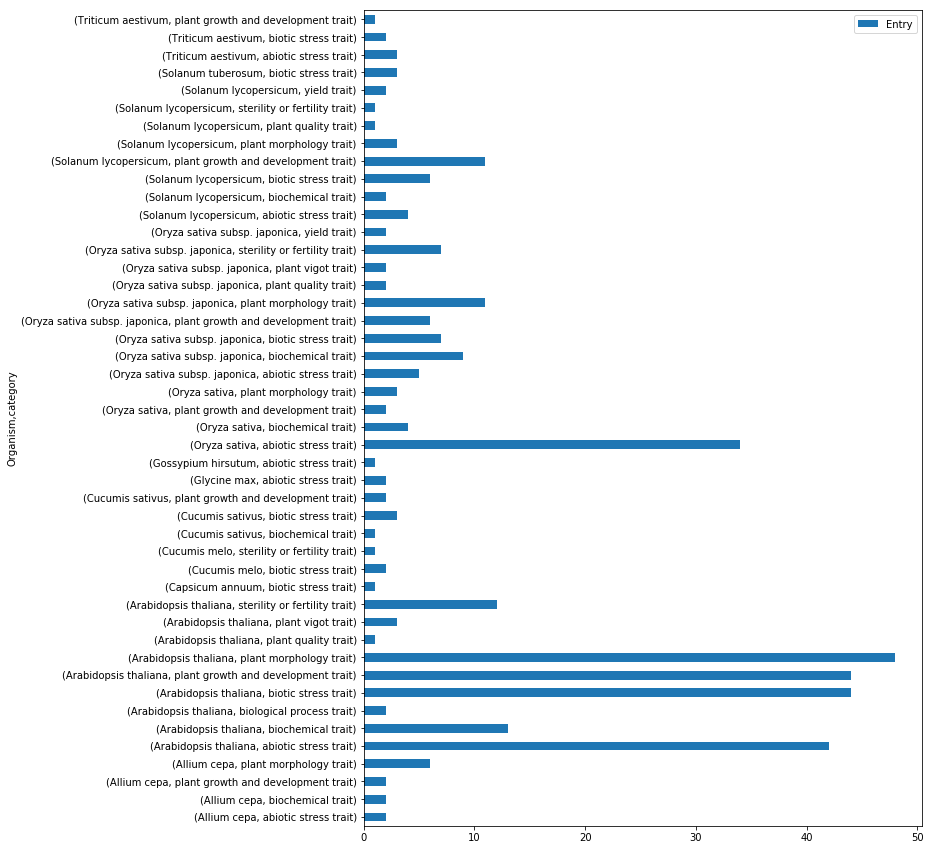

In [110]:
rel_genes = genes[genes['Entry'].isin(numeric_genes.index)]

gb = (rel_genes[['Entry', 'Organism', 'category']]
      .dropna()
      .groupby(['Organism', 'category'])
      .count()
     [['Entry']])
gb.plot(kind='barh', figsize = [10, 15])

# focus only on the most abundant examples (more than 9) 

In [111]:
min_examples = 9

gb = (rel_genes[['Entry', 'Organism', 'category']]
      .dropna()
      .groupby(['Organism', 'category'])
      .count()
     [['Entry']])

gb = gb[gb['Entry'] > min_examples]
gb['to_pick'] = round((gb['Entry'] / gb['Entry'].sum()) * (gb['Entry'].sum() / 5))
gb.style.bar()

# Sample a balanced train and test set:

In [121]:
sampled = []
for organism, category, entry, to_pick in gb.reset_index().values:
    subset = rel_genes[(rel_genes['Organism'] == organism) & (rel_genes['category'] == category)]
    picked = subset.sample(int(to_pick), random_state = 7)
    sampled += picked['Entry'].values.tolist()
sampled = list(set(sampled))

test_set = sampled
train_set = rel_genes[~rel_genes['Entry'].isin(test_set)]['Entry'].unique().tolist()
print(f' we picked total {len(test_set)} genes as test set \n and {len(train_set)} genes in train set')

import json
with open(f'{DATA_DIR}2019_06_14_test_train_gene_set.json', 'w') as f:
    json.dump({'train' : train_set, 'test' : test_set}, f)

 we picked total 46 genes as test set 
 and 221 genes in train set
